In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report

In [ ]:
(x_train,y_train),(x_test,y_test)=datasets.cifar10.load_data()

170508288/170498071 [==============================] - 4s 0us/step


In [ ]:
x_train.shape

(50000, 32, 32, 3)

In [ ]:
x_test.shape

(10000, 32, 32, 3)

In [ ]:
classes=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [ ]:
def plot_sample(x,y,index):
  plt.figure(figsize=(14,2))
  plt.imshow(x[index])
  plt.xlabel(y[index])

/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


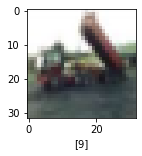

In [ ]:
plot_sample(x_train,y_train,2)

In [ ]:
#normalize
x_train=x_train/255
x_test=x_test/255

In [ ]:
#model
cnn=models.Sequential()

#feature extraction
cnn.add(layers.Conv2D(filters=32,activation='relu',kernel_size=(3,3),input_shape=(32,32,3)))
cnn.add(layers.MaxPooling2D(2,2))
                       
cnn.add(layers.Conv2D(filters=64,activation='relu',kernel_size=(3,3)))
cnn.add(layers.MaxPooling2D(2,2))

#classification
cnn.add(layers.Flatten())
cnn.add(layers.Dense(64,activation='relu'))
cnn.add(layers.Dense(10))

In [ ]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 2304)              0         
                                                                 
 dense (Dense)               (None, 64)                1

In [ ]:
cnn.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [ ]:
cnn.fit(x_train,y_train,epochs=25,validation_data=(x_train,y_train))

Epoch 1/25
1563/1563 [==============================] - 83s 53ms/step - loss: 1.4558 - accuracy: 0.4769 - val_loss: 1.1607 - val_accuracy: 0.5881
Epoch 2/25
1563/1563 [==============================] - 81s 52ms/step - loss: 1.1037 - accuracy: 0.6141 - val_loss: 0.9710 - val_accuracy: 0.6639
Epoch 3/25
1563/1563 [==============================] - 81s 52ms/step - loss: 0.9668 - accuracy: 0.6624 - val_loss: 0.8701 - val_accuracy: 0.6980
Epoch 4/25
1563/1563 [==============================] - 80s 51ms/step - loss: 0.8878 - accuracy: 0.6904 - val_loss: 0.8247 - val_accuracy: 0.7108
Epoch 5/25
1563/1563 [==============================] - 80s 51ms/step - loss: 0.8242 - accuracy: 0.7148 - val_loss: 0.7342 - val_accuracy: 0.7449
Epoch 6/25
1563/1563 [==============================] - 81s 52ms/step - loss: 0.7704 - accuracy: 0.7328 - val_loss: 0.7136 - val_accuracy: 0.7503
Epoch 7/25
1563/1563 [==============================] - 81s 52ms/step - loss: 0.7265 - accuracy: 0.7462 - val_loss: 0.6750 -

In [ ]:
y_pred=cnn.predict(x_test)

In [ ]:
cnn.evaluate(x_test,y_test)

313/313 [==============================] - 5s 15ms/step - loss: 1.4622 - accuracy: 0.6770


[1.4622130393981934, 0.6769999861717224]

In [ ]:
y_test=y_test.reshape(-1)
y_pred=cnn.predict(x_test)

In [ ]:
y_classes=[np.argmax(element) for element in y_pred]
print("classification report :\n",classification_report(y_test,y_classes))

classification report :
               precision    recall  f1-score   support

           0       0.73      0.69      0.71      1000
           1       0.79      0.80      0.80      1000
           2       0.61      0.52      0.56      1000
           3       0.48      0.50      0.49      1000
           4       0.60      0.70      0.65      1000
           5       0.54      0.61      0.57      1000
           6       0.82      0.68      0.74      1000
           7       0.72      0.72      0.72      1000
           8       0.78      0.79      0.79      1000
           9       0.74      0.77      0.75      1000

    accuracy                           0.68     10000
   macro avg       0.68      0.68      0.68     10000
weighted avg       0.68      0.68      0.68     10000

